<a href="https://colab.research.google.com/github/Maitry-P/Rethinking-Urban-Cemeteries-Today-Tomorrow-and-Beyond/blob/main/Urban%20Cemeteries_MP_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Subject : URPL-GP-1620
          Spatial Analysis and Data Visualization Fall’ 19

Project: Pujara, Maitri
Team : Alsina, Celeste | Pujara, Maitri | Rosa, Megan


---



Project Part-1 : I am here to explore the demand for 
cemeteries and look at death rates and data on how many 
people are choosing cremation over burials. 

1. Pre-installed common libraries 

---



The two main libraries used for data manipulation in python are numpy which provides the data type and functions for arrays, and pandas which builds on numpy and provides the the data type and functions for dataframes.


In [ ]:
import pandas as pd
import numpy as np

2. Import the dataset into the google collab



---


If you need to use a library that isn't already available in Colab you'll need to install it yourself. For example, someone has made a copy of R's janitor package for Python but we'll have to install it first. Colab has a nice feature that in the left side bar they have a bunch of helpful Code

In [ ]:
pd.read_csv('https://drive.google.com/uc?export=download&id=1ByQvRMFCcL6ZtynM7SxeczmtkpaaMVgN')

,Year,County Name,Region,Place of Death Code,Place of Death Description,Disposition Code,Disposition Description,Deaths
0,2015,Albany,ROS,A,Hospital-DOA,1,Burial,6
1,2015,Albany,ROS,A,Hospital-DOA,2,Cremation,6
2,2015,Albany,ROS,B,Hospital0-ER,1,Burial,76
3,2015,Albany,ROS,B,Hospital0-ER,2,Cremation,75
4,2015,Albany,ROS,B,Hospital0-ER,4,Holding,3
...,...,...,...,...,...,...,...,...
28452,2017,Yates,ROS,F,Decedent Residence,6,Entombment,2
28453,2017,Yates,ROS,J,Hospice Facility,1,Burial,2
28454,2017,Yates,ROS,J,Hospice Facility,2,Cremation,3
28455,2017,Yates,ROS,P,Other Institution,1,Burial,1


3. Import libraries called 'Janitor'


---


If you need to use a library that isn't already available in Colab you'll need to install it yourself. For example, someone has made a copy of R's janitor package for Python but we'll have to install it first. Colab has a nice feature that in the left side bar they have a bunch of helpful Code

In [ ]:
!pip install -q pyjanitor
import janitor

4. Import dataset and clean names of the dataset and Importing CSV files



---

Now we can import our dataset with the read_csv function from pandas, giving it the URL for our CSV file, and assigning the resulting dataframe to Vital_Statistics.raw. We can then overwrite the Vital_Statistics_raw with a version that has all the column names reformatted by using the clean_names function from janitor.


In [ ]:
Vital_Statistics_raw = pd.read_csv('https://drive.google.com/uc?export=download&id=1ByQvRMFCcL6ZtynM7SxeczmtkpaaMVgN')
Vital_Statistics_raw = janitor.clean_names(Vital_Statistics_raw)

5. Previewing dataframes



---

Now we have a dataframe of our pluto data called Vital_Statistics_raw. In python objects that you create like this dataframe have functions associated with them called "methods" and you can use these like dataframe_name.method_name()



In [ ]:
Vital_Statistics_raw.head()

,year,county_name,region,place_of_death_code,place_of_death_description,disposition_code,disposition_description,deaths
0,2015,Albany,ROS,A,Hospital-DOA,1,Burial,6
1,2015,Albany,ROS,A,Hospital-DOA,2,Cremation,6
2,2015,Albany,ROS,B,Hospital0-ER,1,Burial,76
3,2015,Albany,ROS,B,Hospital0-ER,2,Cremation,75
4,2015,Albany,ROS,B,Hospital0-ER,4,Holding,3


6. In addition to step-5



---


Then we can also use the info method to see all the column names, the number of non-missing rows, and the data type. This is similar to dplyr's glimpse function in R. 


In [ ]:
Vital_Statistics_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28457 entries, 0 to 28456
Data columns (total 8 columns):
year                          28457 non-null int64
county_name                   28457 non-null object
region                        28457 non-null object
place_of_death_code           28457 non-null object
place_of_death_description    28457 non-null object
disposition_code              28457 non-null int64
disposition_description       28457 non-null object
deaths                        28457 non-null int64
dtypes: int64(3), object(5)
memory usage: 1.7+ MB


7. Selecting/dropping/renaming columns



---

We can select a subset of the columns using a few different methods. These are equivilant to dplyr's select function in R.

In [ ]:
Vital_Statistics_slim = Vital_Statistics_raw.loc[:,['year','county_name','region','place_of_death_code','place_of_death_description','disposition_code','disposition_description','deaths']]
Vital_Statistics_slim = Vital_Statistics_slim.rename(columns={'Disposition Description':'dd'})
Vital_Statistics_slim = Vital_Statistics_slim.drop(['place_of_death_code', 'place_of_death_description', 'disposition_code'], axis=1)
Vital_Statistics_slim.head()


,year,county_name,region,disposition_description,deaths
0,2015,Albany,ROS,Burial,6
1,2015,Albany,ROS,Cremation,6
2,2015,Albany,ROS,Burial,76
3,2015,Albany,ROS,Cremation,75
4,2015,Albany,ROS,Holding,3


8. Sorting dataframes



---

Now we can sort the rows in our dataframe to see the 5 buildings with the most total units. This is similar to dplyr's arrange function in R. In this case we just want to see it, but don't need to make a permant change to the dataframe so we won't assign the result to anything but just print the head at the end.

In [ ]:
Vital_Statistics_slim.sort_values('deaths', ascending=False).head()
vital_new = Vital_Statistics_slim.clean_names()
vital_new

,year,county_name,region,disposition_description,deaths
0,2015,Albany,ROS,Burial,6
1,2015,Albany,ROS,Cremation,6
2,2015,Albany,ROS,Burial,76
3,2015,Albany,ROS,Cremation,75
4,2015,Albany,ROS,Holding,3
...,...,...,...,...,...
28452,2017,Yates,ROS,Entombment,2
28453,2017,Yates,ROS,Burial,2
28454,2017,Yates,ROS,Cremation,3
28455,2017,Yates,ROS,Burial,1


9. Method Chaining



---


As you can see above, when we have a dataframe and use a method that returns a dataframe we and then use another method on that result. This is called "method chaining" because we can chain together multiple calls to methods on an object. This achieves a similar goal as the %>% (pipe) operator in R's tidyverse packages. As you can imagine your code can get a little hard to read when you do a lot of this chaining all on one line. However, unlike R, in Python indentation has special meaning so we have to be careful with formating our code. To group together section where we are using method chaining we need to wrap the whole thing in parentheses.

In [ ]:
queens_nyc = (
    vital_new
      .query("county_name == 'Queens'")
      .query("region == 'NYC'")
      .query("disposition_description == 'Cremation' or disposition_description == 'Burial' ")
      .groupby(['disposition_description','year','region','county_name'])
      .sum()
      .reset_index()
      .sort_values('deaths', ascending = False)
      )

queens_nyc

,disposition_description,year,region,county_name,deaths
0,Burial,2003,NYC,Queens,11543
1,Burial,2004,NYC,Queens,10979
2,Burial,2005,NYC,Queens,10942
3,Burial,2006,NYC,Queens,10560
4,Burial,2007,NYC,Queens,10227
5,Burial,2008,NYC,Queens,9740
9,Burial,2012,NYC,Queens,9407
6,Burial,2009,NYC,Queens,9392
7,Burial,2010,NYC,Queens,9249
8,Burial,2011,NYC,Queens,9095


10. Filtering rows with query



---


We can use the query method on our dataframe to filter to only the buildings in Queens. This is similar to the dplyr's filter function in R.

In [ ]:
queens_nyc = (
    vital_new
      .query("county_name == 'Queens'")
      .query("region == 'NYC'")
      .query("disposition_description == 'Cremation' or disposition_description == 'Burial' ")
      .groupby(['disposition_description','year'])
      .sum()
      .reset_index()
      .sort_values('deaths', ascending = False)
      )

queens_nyc

,disposition_description,year,deaths
0,Burial,2003,11543
1,Burial,2004,10979
2,Burial,2005,10942
3,Burial,2006,10560
4,Burial,2007,10227
5,Burial,2008,9740
9,Burial,2012,9407
6,Burial,2009,9392
7,Burial,2010,9249
8,Burial,2011,9095


11. Creating new columns



---


To create new columns in our dataframe we can use the method assign. This works similarly to dplyr's mutate function in R. Note that, unlike mutate, we need to specify the columns with either dataframe_name.column_name or dataframe_name['column_name']. Similar to in R, to use the dataframe_name.column_name style your column names can't have spaces or special characters. Luckily we've already used janitor.clean_names() so we won't have any problems.

In [ ]:
queens_nyc.sort_values(by=['year','disposition_description'], ascending=False)

,disposition_description,year,deaths
29,Cremation,2017,5163
14,Burial,2017,8568
28,Cremation,2016,4931
13,Burial,2016,8710
27,Cremation,2015,4521
12,Burial,2015,8572
26,Cremation,2014,4383
11,Burial,2014,8914
25,Cremation,2013,4119
10,Burial,2013,8957


12. Format output with style


---

After using the dataset, one can count the total number of deaths in Queens county, NYC

In [ ]:
('{:,}').format(sum_deaths)

NameError: ignored

In [ ]:
deaths_by_region


NameError: ignored

13. Grouping and aggregating



---

We can aggregate our dataframe by values of an existing column using the groupby method on our dataframe in combindation with one of a few different aggregation methods. This is similar to the pattern of dplyr's group_by and summarize in R.

Like with dplyr's group_by() and ungroup(), it's important to "ungroup" your datagrame after your aggregation using reset_index()

In [ ]:
queens_nyc.groupby(['disposition_description']).count().reset_index().head()

,disposition_description,year,deaths
0,Burial,15,15
1,Cremation,15,15


In [ ]:
queens_nyc.groupby(['deaths']).mean().reset_index().head()

,deaths,year
0,3002,2004
1,3006,2003
2,3060,2005
3,3104,2006
4,3197,2007


In [ ]:
queens_nyc.groupby(['disposition_description']).agg({'deaths':'sum'}).reset_index().head()

,disposition_description,deaths
0,Burial,144855
1,Cremation,56951


14. Plotting with matplotlib


---


Matplotlib is the most common plotting package and one can add other additional packages as well.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#!pip install -q pyjanitor
import janitor

15. Import and Clean Dataset

---



In [ ]:
queens_nyc = queens_nyc.pivot(index = 'year', columns = 'disposition_description').reset_index()
#it is important to reset the index here
queens_nyc.head()

year deaths          
disposition_description       Burial Cremation
0                        2003  11543      3006
1                        2004  10979      3002
2                        2005  10942      3060
3                        2006  10560      3104
4                        2007  10227      3197

16. Import and Clean Dataset


---



In [ ]:
queens_nyc = (
    vital_new
      .query("county_name == 'Queens'")
      .query("region == 'NYC'")
      .query("disposition_description == 'Cremation' or disposition_description == 'Burial' ")
      .groupby(['disposition_description','year'])
      .sum()
      .reset_index()
      .sort_values('deaths', ascending = False)
      )

queens_nyc

,disposition_description,year,deaths
0,Burial,2003,11543
1,Burial,2004,10979
2,Burial,2005,10942
3,Burial,2006,10560
4,Burial,2007,10227
5,Burial,2008,9740
9,Burial,2012,9407
6,Burial,2009,9392
7,Burial,2010,9249
8,Burial,2011,9095


In [ ]:
queens_pivoted = queens_nyc.pivot(index ='year', columns ='disposition_description', values ='deaths').reset_index()
queens_pivoted.head()

disposition_description,year,Burial,Cremation
0,2003,11543,3006
1,2004,10979,3002
2,2005,10942,3060
3,2006,10560,3104
4,2007,10227,3197


17. Creating a Bar Chart-1

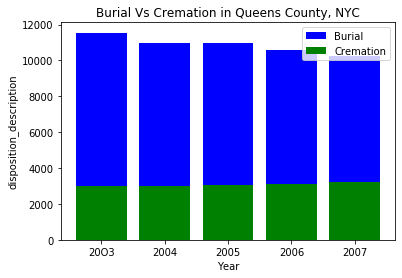

In [ ]:
x1 = ['20O3','2004','2005','2006','2007']
y1 = [11543, 10979, 10942, 10560, 10227]
y2 = [3006, 3002, 3060, 3104, 3197]

# Colors: https://matplotlib.org/api/colors_api.html

plt.bar(x1, y1, label="Burial", color='b')
plt.bar(x1, y2, label="Cremation", color='g')
plt.plot()

plt.xlabel("Year")
plt.ylabel("disposition_description")
plt.title("Burial Vs Cremation in Queens County, NYC")
plt.legend()
plt.show()

Source: Vital Statistics Deaths by Resident County, Region, Place of Death: Beginning 2003, NYC Gov

18. Creating a Graph-2


---



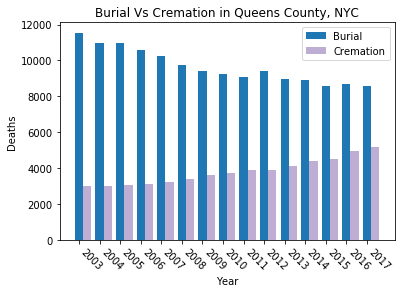

In [ ]:
y1 = queens_pivoted['Burial']
y2 = queens_pivoted['Cremation']
years = ['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
X = np.arange(15)
plt.xticks(X,years) 

plt.bar(X + 0.00, y1, label="Burial", color = '#1f78b4', width = 0.40)
plt.bar(X + 0.40, y2, label="Cremation", color = '#beaed4', width = 0.40)

plt.xticks(rotation=-45, horizontalalignment="left")

plt.plot()

plt.xlabel("Year")
plt.ylabel("Deaths")
plt.title("Burial Vs Cremation in Queens County, NYC")
plt.legend()
plt.show()

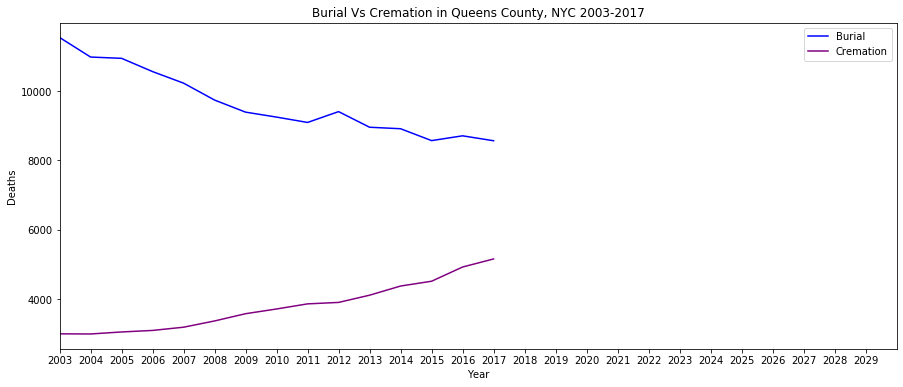

In [ ]:
plt.figure(figsize=(15,6))
plt.plot( 'year', 'Burial', data=queens_pivoted, color='blue', label= "Burial")
plt.plot( 'year', 'Cremation', data=queens_pivoted, color='purple', label= "Cremation")
#2001 is the starting point, 2017 is the end point, and 1 is the interval
plt.xlim(2003, 2030)
plt.xticks(np.arange(2003, 2030, 1))
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.title("Burial Vs Cremation in Queens County, NYC 2003-2017")
plt.legend()
plt.show()

Source: Vital Statistics Deaths by Resident County, Region, Place of Death: Beginning 2003, NYC Gov


19. Creating a Graph-3


---



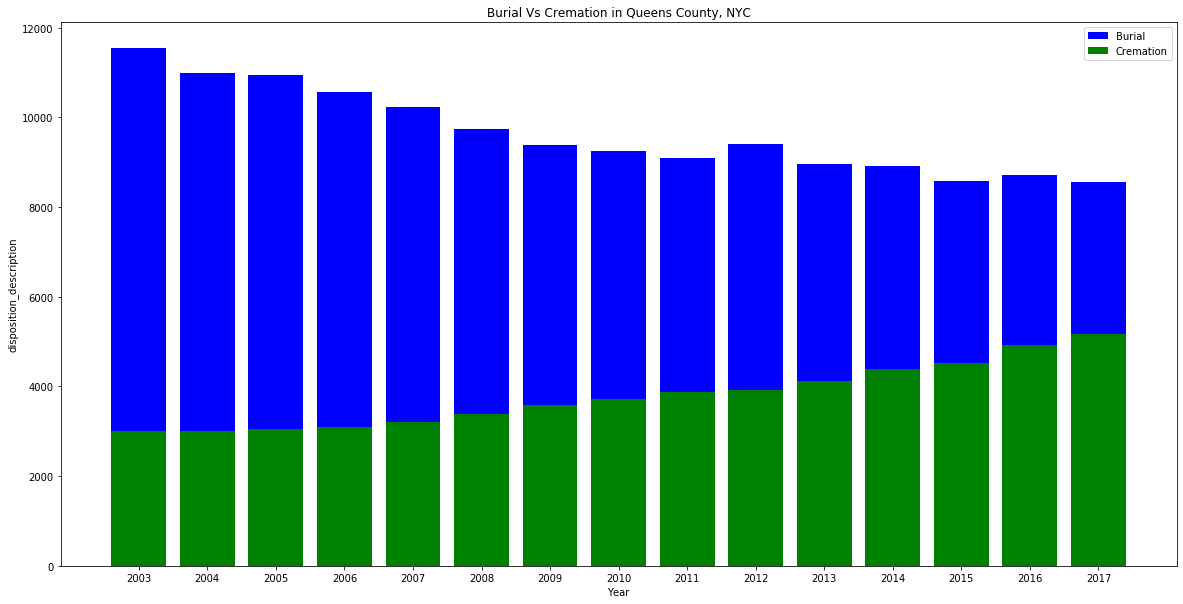

In [ ]:
x1 = ['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
y1 = [11543, 10979, 10942, 10560, 10227, 9740, 9392, 9249, 9095, 9407, 8957, 8914, 8572, 8710, 8568]
y2 = [3006, 3002, 3060, 3104, 3197, 3377, 3586, 3722, 3869, 3911, 4119, 4383, 4521, 4931, 5163]

# Colors: https://matplotlib.org/api/colors_api.html

plt.bar(x1, y1, label="Burial", color='b')
plt.bar(x1, y2, label="Cremation", color='g')
plt.plot()

plt.xlabel("Year")
plt.ylabel("disposition_description")
plt.title("Burial Vs Cremation in Queens County, NYC")
plt.legend()
plt.show()

Source : Vital Statistics Deaths by Resident County, Region, Place of Death: Beginning 2003, NYC Gov

20. Creating a Graph-4


---



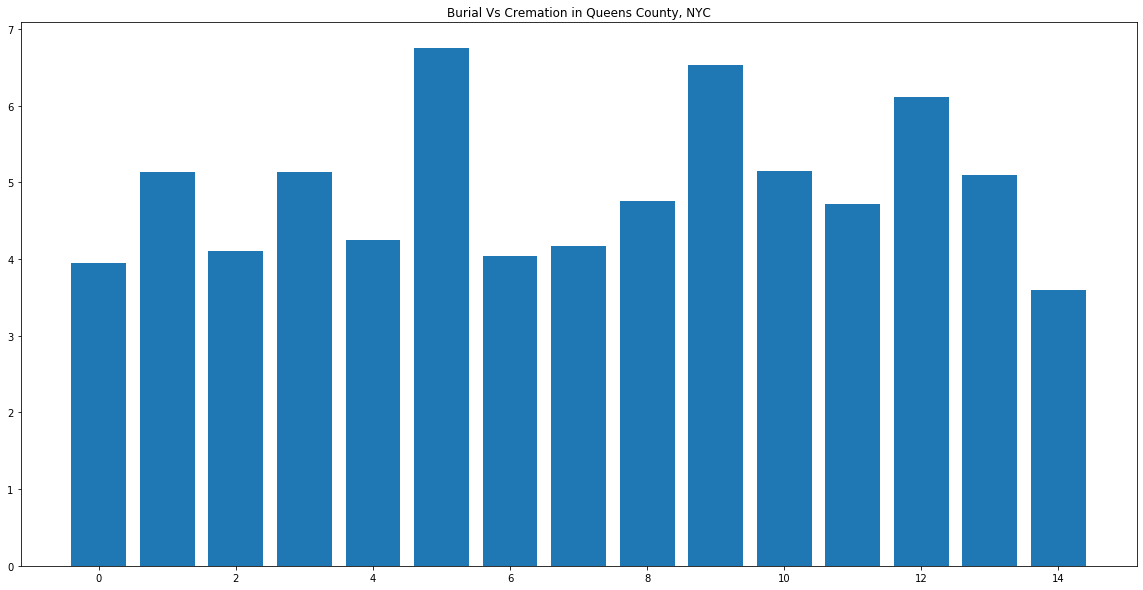

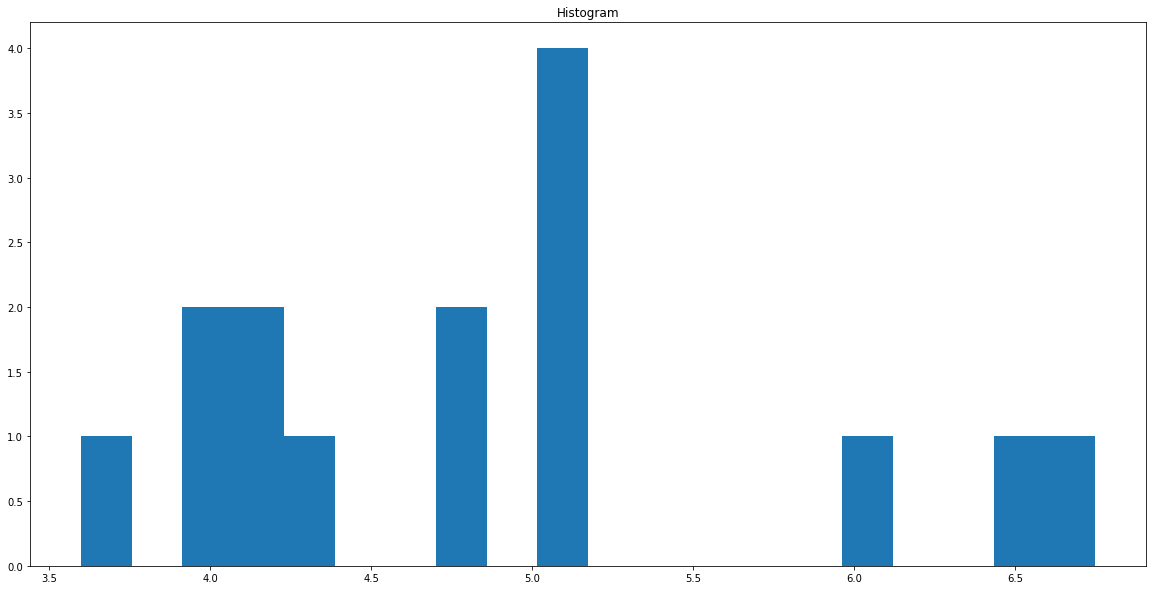

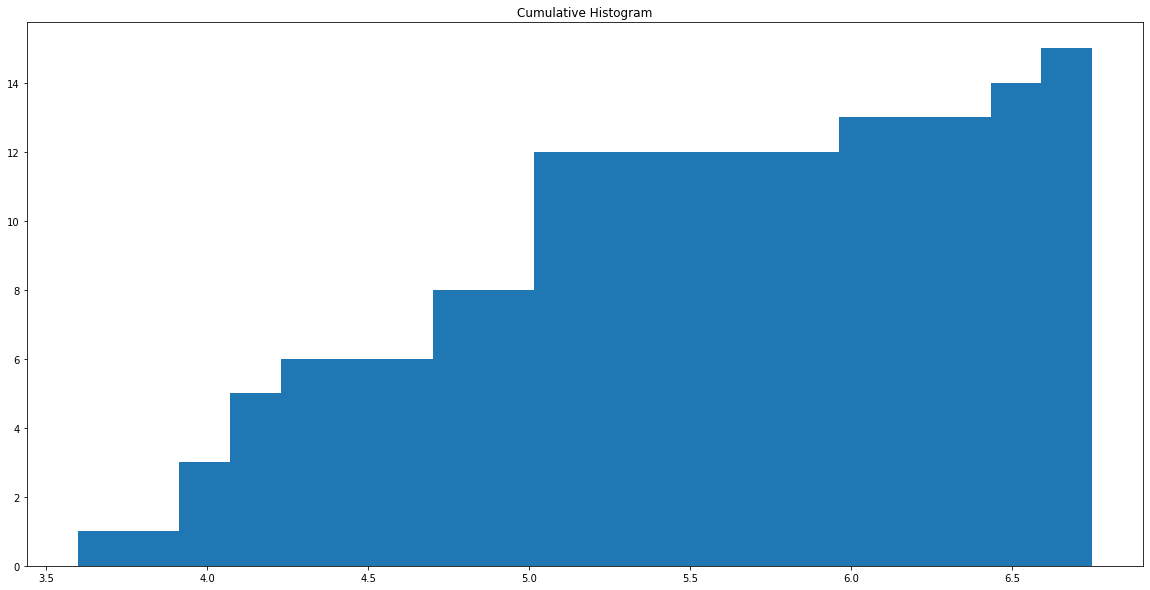

In [ ]:
# Use numpy to generate a bunch of random data in a bell curve around 5.
n = 5 + np.random.randn(15)

m = [m for m in range(len(n))]
plt.bar(m, n)
plt.title("Burial Vs Cremation in Queens County, NYC")
plt.show()

plt.hist(n, bins=20)
plt.title("Histogram")
plt.show()

plt.hist(n, cumulative=True, bins=20)
plt.title("Cumulative Histogram")
plt.show()

21. Creating a Graph-5


---



In [ ]:
import altair as alt

In [ ]:
alt.Chart(queens_pivoted).mark_bar(color='goldenrod').encode(
    x=alt.X(
        'Burial',
        axis=alt.Axis( format='%', title='deaths')
    ),
    y=alt.Y(
        'Cremation',
        sort=alt.EncodingSortField(
            field="disposition_description"
        ),
        axis=alt.Axis(title='Burial Vs Cremation in Queens County, NYC')
        )
    )

alt.Chart(...)

22. Creating a Graph-6


---



In [ ]:
bars = alt.Chart(queens_pivoted).mark_bar(color='goldenrod').encode(
  x=alt.X(
      'Burial',
      axis=alt.Axis(format='%', title='deaths')
  ),
  y=alt.Y(
    'Cremation',
    sort=alt.EncodingSortField(
      field="deaths",    # The field to use for the sort
      order="descending" # The order to sort in
    ),
    axis=alt.Axis(title='Burial Vs Cremation in Queens County, NYC')
  )
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('Cremation', format=".1%")
)

(bars + text).properties(
    title='Share of "Housing New York" Units that are New Construction, Queens Community Districts',
    # width=800,
    # height=600
)


alt.LayerChart(...)

Project Part-2 : I am here to explore all the counties in NewYork City considering all death rates.


---



1. Pre-installed common libraries 

---



The two main libraries used for data manipulation in python are numpy which provides the data type and functions for arrays, and pandas which builds on numpy and provides the the data type and functions for dataframes.



---
2. Import the dataset into the google collab



---


If you need to use a library that isn't already available in Colab you'll need to install it yourself. For example, someone has made a copy of R's janitor package for Python but we'll have to install it first. Colab has a nice feature that in the left side bar they have a bunch of helpful Code


In [ ]:
import pandas as pd
import numpy as np


pd.read_csv('https://drive.google.com/uc?export=download&id=1ByQvRMFCcL6ZtynM7SxeczmtkpaaMVgN')

,Year,County Name,Region,Place of Death Code,Place of Death Description,Disposition Code,Disposition Description,Deaths
0,2015,Albany,ROS,A,Hospital-DOA,1,Burial,6
1,2015,Albany,ROS,A,Hospital-DOA,2,Cremation,6
2,2015,Albany,ROS,B,Hospital0-ER,1,Burial,76
3,2015,Albany,ROS,B,Hospital0-ER,2,Cremation,75
4,2015,Albany,ROS,B,Hospital0-ER,4,Holding,3
...,...,...,...,...,...,...,...,...
28452,2017,Yates,ROS,F,Decedent Residence,6,Entombment,2
28453,2017,Yates,ROS,J,Hospice Facility,1,Burial,2
28454,2017,Yates,ROS,J,Hospice Facility,2,Cremation,3
28455,2017,Yates,ROS,P,Other Institution,1,Burial,1


3. Import libraries called 'Janitor'


---


If you need to use a library that isn't already available in Colab you'll need to install it yourself. For example, someone has made a copy of R's janitor package for Python but we'll have to install it first. Colab has a nice feature that in the left side bar they have a bunch of helpful Code

In [ ]:
!pip install -q pyjanitor
import janitor
Vital_Statistics_raw = pd.read_csv('https://drive.google.com/uc?export=download&id=1ByQvRMFCcL6ZtynM7SxeczmtkpaaMVgN')
Vital_Statistics_raw = janitor.clean_names(Vital_Statistics_raw)
Vital_Statistics_raw.head()

,year,county_name,region,place_of_death_code,place_of_death_description,disposition_code,disposition_description,deaths
0,2015,Albany,ROS,A,Hospital-DOA,1,Burial,6
1,2015,Albany,ROS,A,Hospital-DOA,2,Cremation,6
2,2015,Albany,ROS,B,Hospital0-ER,1,Burial,76
3,2015,Albany,ROS,B,Hospital0-ER,2,Cremation,75
4,2015,Albany,ROS,B,Hospital0-ER,4,Holding,3


4. Import dataset and clean names of the dataset and Importing CSV files



---

Now we can import our dataset with the read_csv function from pandas, giving it the URL for our CSV file, and assigning the resulting dataframe to Vital_Statistics.raw. We can then overwrite the Vital_Statistics_raw with a version that has all the column names reformatted by using the clean_names function from janitor.



---
5. Previewing dataframes



---

Now we have a dataframe of our pluto data called Vital_Statistics_raw. In python objects that you create like this dataframe have functions associated with them called "methods" and you can use these like dataframe_name.method_name()


In [ ]:
Vital_Statistics_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28457 entries, 0 to 28456
Data columns (total 8 columns):
year                          28457 non-null int64
county_name                   28457 non-null object
region                        28457 non-null object
place_of_death_code           28457 non-null object
place_of_death_description    28457 non-null object
disposition_code              28457 non-null int64
disposition_description       28457 non-null object
deaths                        28457 non-null int64
dtypes: int64(3), object(5)
memory usage: 1.7+ MB


6. Selecting/dropping/renaming columns



---

We can select a subset of the columns using a few different methods. These are equivilant to dplyr's select function in R.

In [ ]:
Vital_Statistics_slim = Vital_Statistics_raw.loc[:,['year', 'county_name', 'region', 'place_of_death_code', 'place_of_death_description', 'disposition_code', 'disposition_description', 'deaths']]
Vital_Statistics_slim = Vital_Statistics_slim.drop(['place_of_death_code', 'disposition_code', 'place_of_death_description'], axis=1)
Vital_Statistics_slim = Vital_Statistics_slim.rename(columns={'disposition_description':'B-C'})
Vital_Statistics_slim = Vital_Statistics_slim.rename(columns={'county_name':'county'})
Vital_Statistics_slim.head()

,year,county,region,B-C,deaths
0,2015,Albany,ROS,Burial,6
1,2015,Albany,ROS,Cremation,6
2,2015,Albany,ROS,Burial,76
3,2015,Albany,ROS,Cremation,75
4,2015,Albany,ROS,Holding,3


7. Sorting dataframes



---

Now we can sort the rows in our dataframe to see the 5 buildings with the most total units. This is similar to dplyr's arrange function in R. In this case we just want to see it, but don't need to make a permant change to the dataframe so we won't assign the result to anything but just print the head at the end.

In [ ]:
NYC_bldgs = Vital_Statistics_raw.query("region == 'NYC'")

NYC_bldgs.head()

,year,county_name,region,place_of_death_code,place_of_death_description,disposition_code,disposition_description,deaths
67,2015,Bronx,NYC,A,Hospital-DOA,1,Burial,114
68,2015,Bronx,NYC,A,Hospital-DOA,2,Cremation,67
69,2015,Bronx,NYC,B,Hospital0-ER,1,Burial,504
70,2015,Bronx,NYC,B,Hospital0-ER,2,Cremation,378
71,2015,Bronx,NYC,B,Hospital0-ER,3,Removal from State (Transit),9


8. Selecting/dropping/renaming columns



---

We can select a subset of the columns using a few different methods. These are equivilant to dplyr's select function in R.

In [ ]:
Vital_Statistics_slim = Vital_Statistics_raw.loc[:,['year', 'county_name', 'region', 'place_of_death_code', 'place_of_death_description', 'disposition_code', 'disposition_description', 'deaths']]
Vital_Statistics_slim = Vital_Statistics_raw.query("region == 'NYC'")
Vital_Statistics_slim = Vital_Statistics_slim.drop(['place_of_death_code', 'disposition_code', 'place_of_death_description'], axis=1)
Vital_Statistics_slim = Vital_Statistics_slim.rename(columns={'disposition_description':'B-C'})
Vital_Statistics_slim = Vital_Statistics_slim.rename(columns={'county_name':'county'})
Vital_Statistics_slim.head()

,year,county,region,B-C,deaths
67,2015,Bronx,NYC,Burial,114
68,2015,Bronx,NYC,Cremation,67
69,2015,Bronx,NYC,Burial,504
70,2015,Bronx,NYC,Cremation,378
71,2015,Bronx,NYC,Removal from State (Transit),9


9. Sorting dataframes



---

Now we can sort the rows in our dataframe to see the 5 buildings with the most total units. This is similar to dplyr's arrange function in R. In this case we just want to see it, but don't need to make a permant change to the dataframe so we won't assign the result to anything but just print the head at the end.

In [ ]:
Vital_Statistics_slim.sort_values('deaths', ascending=False).head()
vital_new = Vital_Statistics_slim.clean_names()
vital_new

,year,county,region,b_c,deaths
67,2015,Bronx,NYC,Burial,114
68,2015,Bronx,NYC,Cremation,67
69,2015,Bronx,NYC,Burial,504
70,2015,Bronx,NYC,Cremation,378
71,2015,Bronx,NYC,Removal from State (Transit),9
...,...,...,...,...,...
27978,2017,Richmond,NYC,Anatomical Gift,2
27979,2017,Richmond,NYC,Burial,32
27980,2017,Richmond,NYC,Cremation,26
27981,2017,Richmond,NYC,Removal from State (Transit),11


10. Filtering rows with query



---


We can use the query method on our dataframe to filter to only the buildings in Queens. This is similar to the dplyr's filter function in R.

In [ ]:
queens_nyc = (
    vital_new
      .query("county == 'Queens' or  county == 'Bronx' or county == 'Kings' or county == 'Manhattan' or county == 'Richmond' ")
      .query("region == 'NYC'")
      .query("b_c == 'Cremation' or b_c == 'Burial' ")
      .groupby(['b_c','year','deaths','county'])
      .sum()
      .reset_index()
      .sort_values('deaths', ascending=False)
)

queens_nyc.head()

,b_c,year,deaths,county,region
48,Burial,2003,8223,Kings,NYC
98,Burial,2004,8037,Kings,NYC
147,Burial,2005,7714,Kings,NYC
245,Burial,2007,7142,Kings,NYC
195,Burial,2006,6978,Kings,NYC


In [ ]:
queens_nyc_slim = (
    queens_nyc
      .query("county == 'Queens' or  county == 'Bronx' or county == 'Kings' or county == 'Manhattan' or county == 'Richmond' ")
      .query("b_c == 'Cremation' or b_c == 'Burial' ")
      .groupby(['b_c','year','deaths','county'])
      .sum()
      .reset_index()
      .sort_values('deaths', ascending=False)
    )
queens_nyc_slim.head()

,b_c,year,deaths,county,region
48,Burial,2003,8223,Kings,NYC
98,Burial,2004,8037,Kings,NYC
147,Burial,2005,7714,Kings,NYC
245,Burial,2007,7142,Kings,NYC
195,Burial,2006,6978,Kings,NYC


11. Creating new columns



---


To create new columns in our dataframe we can use the method assign. This works similarly to dplyr's mutate function in R. Note that, unlike mutate, we need to specify the columns with either dataframe_name.column_name or dataframe_name['column_name']. Similar to in R, to use the dataframe_name.column_name style your column names can't have spaces or special characters. Luckily we've already used janitor.clean_names() so we won't have any problems.

In [ ]:
queens_cd_units = (queens_nyc_slim
  .groupby(['county'])
  .agg(total_deaths_avg=('deaths', 'mean'))
  .reset_index()
  .head()
)

queens_cd_units

,county,total_deaths_avg
0,Bronx,469.996337
1,Kings,848.066421
2,Manhattan,513.663043
3,Queens,695.755172
4,Richmond,209.679654


12. Creating new column of 'Total_Deaths_Average'

---



In [ ]:
queens_cd_units.style.format({
  'total_units_avg': '{:.1f}'.format,
})

,county,total_deaths_avg
0,Bronx,469.996
1,Kings,848.066
2,Manhattan,513.663
3,Queens,695.755
4,Richmond,209.68


13. Creating a Graph-2


---



In [ ]:
import altair as alt
alt.Chart(queens_cd_units).mark_bar(color='goldenrod').encode(
  x=alt.X(
      'total_deaths_avg',
      axis=alt.Axis(title='Average Total Death per County')
  ),
  y=alt.Y(
    'county',
    sort=alt.EncodingSortField(
      field="total_deaths_avg",    # The field to use for the sort
      order="descending" # The order to sort in
    ),
    axis=alt.Axis(title='County in NYC')
  )
)

alt.Chart(...)

14. Creating a Graph-2 (Extra)

---

Unlike R where ggplot2 is pretty much the univsal standard for graphing, in Python there are a lot of different packages that are commonly used. matplotlib is one very popular one, seaborn is a libray based on matplotlib that offers a simpler syntax and nicer defaults.

Google Colab notebooks have a helpful sidepane with code snippets that you can browse and automatically add into your notebook. These snippets all use a different newer plotting library called altair. Here we build from some of the snippets provided to visualize our housing dataset.

Here is the snippet eactly as Colab provides it. Note that there are lots of parts here that you can cut out. To make the example work on it's own they import some sampe data, but we have our own data to use so we can remove that and swap in our dataset. We'll start by using the dataset we already summarized for stats about Queens commmunity districts.

In [ ]:
alt.Chart(queens_cd_units).mark_bar().encode(
  x='total_deaths_avg',
  y='county',
)


alt.Chart(...)